In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,accuracy_score,recall_score,precision_recall_curve,precision_recall_fscore_support

In [51]:
class Metrics:
    def __init__(self):
        pass

#comment
    def accuracy(self,y_true,y_pred):
        '''
        Function to calculate accuracy
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score
        '''
        correct_counter = 0.
        for yt,yp in zip(y_true,y_pred):
            if yt == yp:
                correct_counter += 1
        return  correct_counter/len(y_true)

    def true_positive(self,y_true,y_pred):
        '''
        Function to calculate accuracy
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score
        '''
        tp_counter = 0
        for yt,yp in zip(y_true,y_pred):
            if yt == 1 and yp == 1:
                tp_counter += 1
        return  tp_counter

    def true_negative(self,y_true,y_pred):
        '''Function to calculate accuracy
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score

        '''
        tn_counter = 0
        for yt,yp in zip(y_true,y_pred):
            if yt == 0 and yp == 0:
                tn_counter += 1
        return  tn_counter

    def false_positive(self,y_true,y_pred):
        '''
        Function to calculate accuracy
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score
        '''
        fp_counter = 0
        for yt,yp in zip(y_true,y_pred):
            if yt == 0 and yp == 1:
                fp_counter += 1
        return  fp_counter

    def false_negative(self,y_true,y_pred):
        '''
        Function to calculate accuracy
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score
        '''
        fn_counter = 0
        for yt,yp in zip(y_true,y_pred):
            if yt == 1 and yp == 0:
                fn_counter += 1
        return  fn_counter

    def accuracy_v2(self,y_true, y_pred):

        """
        Function to calculate accuracy using tp/tn/fp/fn
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: accuracy score
        """
        tp = self.true_positive(y_true, y_pred)
        fp = self.false_positive(y_true, y_pred)
        fn = self.false_negative(y_true, y_pred)
        tn = self.true_negative(y_true, y_pred)
        accuracy_score = (tp + tn) / (tp + tn + fp + fn)
        return accuracy_score

    def precision(self,y_true,y_pred):
        '''
        out of all predicted values how many are actual true
        tp/tp+fp
        '''
        tp = self.true_positive(y_true,y_pred)
        fp = self.false_positive(y_true,y_pred)

        return tp/(tp+fp)

    def recall(self,y_true,y_pred):
        '''
        out of all true value, how many were predicted correct
        tp/tp+fn
        '''
        tp = self.true_positive(y_true,y_pred)
        fn = self.false_negative(y_true,y_pred)

        return tp/(tp+fn)
    
    def f1(self,y_true, y_pred):
        """
        Function to calculate f1 score
        :param y_true: list of true values
        :param y_pred: list of predicted values
        :return: f1 score
        """
        p = self.precision(y_true, y_pred)
        r = self.recall(y_true, y_pred)
        score = 2 * p * r / (p + r)
        return score
    
    def tpr(self,y_true,y_pred):
        '''
        also called as recall or sensitivity
        '''
        return self.recall(y_true,y_pred)

    def fpr(self,y_true,y_pred):
        '''
        '''
        fp = self.false_positive(y_true,y_pred)
        tn = self.true_negative(y_true,y_pred)
        
        return  fp/(fp+tn)




In [52]:
metric = Metrics()

In [16]:
metrics.accuracy(y_true=[1,0,0],y_pred=[1,1,1])

0.3333333333333333

In [20]:
metric.recall([1,0,0,1],[0,0,0,1])

0.5

In [21]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
0.0490937, 0.0191491, 0.17554844,
 0.15952202, 0.03819563, 0.11639273,
 0.079377, 0.08584789, 0.39095342,
 0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
 0.61977213, 0.33056815]

In [32]:
precisons = []
recalls = []
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]

for i in thresholds:
    temp_pred = [1 if y_p >= i else 0 for y_p in y_pred ]
    print(f'for threshold {i}')
    print(f'temp Preicted {temp_pred}')
    print(f'true values   {y_true}')
    p = metric.precision(y_true,temp_pred)
    r = metric.recall(y_true,temp_pred)
    precisons.append(p)
    recalls.append(r)
    
    

for threshold 0.0490937
temp Preicted [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
true values   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
for threshold 0.05934905
temp Preicted [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
true values   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
for threshold 0.079377
temp Preicted [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
true values   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
for threshold 0.08584789
temp Preicted [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
true values   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
for threshold 0.11114267
temp Preicted [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
true values   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
for threshold 0.11639273
temp Preicted [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
true values   [0, 0, 0, 1, 0

Text(0, 0.5, 'Precision')

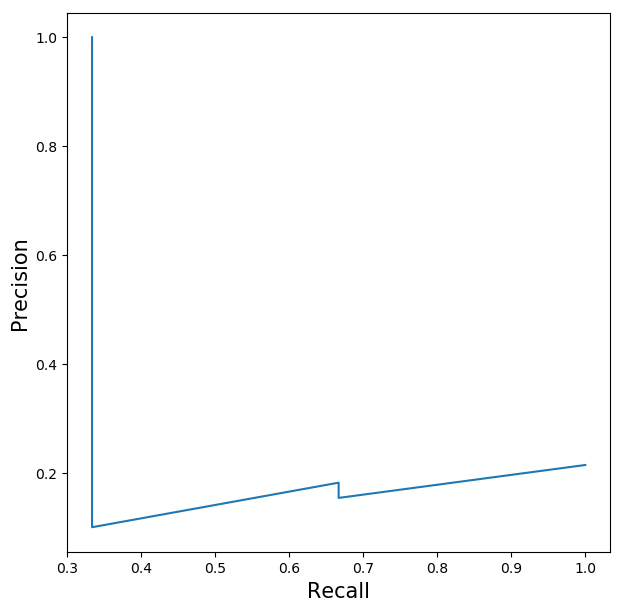

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisons)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [ ]:
#recall to be low, FN should be high, it happens when thrshold is set to high.
#precsision to be low, FP shoul be hight, it happens thrshild is set to low.

In [46]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

print(metric.f1(y_true,y_pred))

0.5714285714285715


In [57]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for i in thresholds:
    t_pred = [1 if y_p >= i else 0for y_p in y_pred]
    tpr = metric.tpr(y_true,t_pred)
    fpr = metric.fpr(y_true,t_pred)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

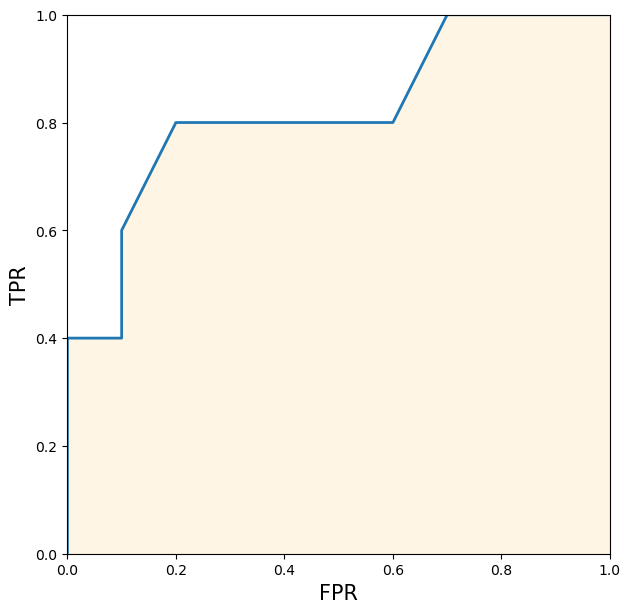

In [66]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, color='orange',alpha=0.1,)
plt.plot(fpr_list, tpr_list, lw=2)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [87]:
def log_loss(y_true,y_pred):
    '''
    -1.0**(true *log(pred)) + (1-true)*log(1-pred)
    '''
    epsilon = 1e-15
    loss = []
    
    for yt,yp in zip(y_true,y_pred):
        #print(f"yp before {yp}")
        yp = np.clip(yp,epsilon,1-epsilon)#make the vale in range eps to 1-eps
        #print(f'yp after {yp}')
        
        temp_loss = -1.0*(yt*np.log(yp)) + (1 - yt)* np.log(1 - yp)
        loss.append(temp_loss)
    return np.mean(loss)    

In [82]:
#np.clip()
1e-15,1-1e-15

(1e-15, 0.999999999999999)

In [102]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]

log_loss(y_true,y_proba)
print(log_loss(y_true,y_proba))

2.7944414837265272


- <b>Macro averaged precision</b>: calculate precision for all classes individually
and then average them
- <b>Micro averaged precision</b>: calculate class wise true positive and false
positive and then use that to calculate overall precision
- <b>Weighted precision</b>: same as macro but in this case, it is weighted average
depending on the number of items in each class


In [110]:
def macro_precision(y_true,y_pred):
    
    num_classes = len(np.unique(y_true))
    
    precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        print(f'{temp_true} after alteration')
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        print(f'{temp_pred} after alteration')
        m = Metrics()
        tp = m.true_positive(temp_true,temp_pred)
        fp = m.false_positive(temp_true,temp_pred)
        
        precision =+ tp/(tp+fp)
    return precision/num_classes  

In [ ]:
def micro_precision(y_true,y_pred):
    
    num_classes = len(np.unique(y_true))
    
    precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        print(f'{temp_true} after alteration')
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        print(f'{temp_pred} after alteration')
        m = Metrics()
        tp = m.true_positive(temp_true,temp_pred)
        fp = m.false_positive(temp_true,temp_pred)
        
        precision =+ tp/(tp+fp)
    return precision/num_classes  

In [115]:
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
    # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        # and update overall tp
        m = Metrics()
        tp += m.true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        # and update overall tp
        fp += m.false_positive(temp_true, temp_pred)
        # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [123]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        m = Metrics()
        # calculate tp and fp for class
        tp = m.true_positive(temp_true, temp_pred)
        fp = m.false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
        # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [119]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_precision(y_true,y_pred)

[1, 0, 0, 1, 0, 0, 1, 0, 0] after alteration
[1, 0, 0, 1, 0, 0, 1, 1, 0] after alteration
[0, 1, 0, 0, 1, 0, 0, 0, 0] after alteration
[0, 0, 1, 0, 0, 1, 0, 0, 0] after alteration
[0, 0, 1, 0, 0, 1, 0, 1, 1] after alteration
[0, 1, 0, 0, 1, 0, 0, 0, 1] after alteration


0.1111111111111111

In [116]:
micro_precision(y_true,y_pred)

0.4444444444444444

In [124]:
weighted_precision(y_true,y_pred)

0.39814814814814814

In [150]:
def weighted_f1(y_true,y_pred):
    '''
    2*p*r/(p+r) *weights1 +....
    '''
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    f1 = 0
    
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        m = Metrics()
        p = m.precision(temp_true, temp_pred)
        r = m.recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 preci
        
    return f1/len(y_true)

In [151]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
weighted_f1(y_true,y_proba)


ZeroDivisionError: division by zero

Text(0.5, 57.249999999999986, 'Predicted Labels')

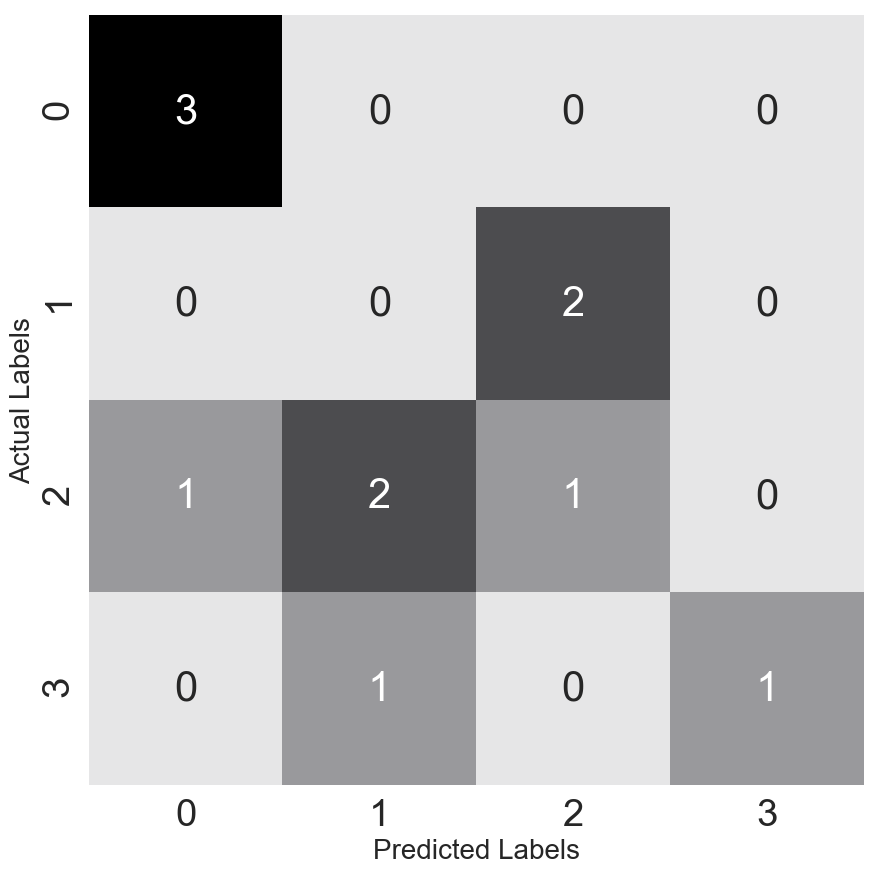

In [154]:
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2,3,3]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2,1,3]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(5, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

# Mutlilabel classification Metrics

In [ ]:
def pk(y_true,y_pred,k):
    '''
    returns : precision at k
    '''
    if k == 0:
        return 0
    
    y_pred = 

# Regression Metrics

In [156]:
#MAE
def mean_absolute_error(y_true,y_pred):
    '''
    
    '''
    error = 0
    for yt,yp in zip(y_true,y_pred):
        
        error += np.abs(yp-yt)
    return error/len(y_true)    
        
    
def mean_squared_error(y_true,y_pred):
    
    error = 0
    for yt,yp in zip(y_true,y_pred):
        
        error += (yp-yt)**2
    return error/len(y_true)    

def mean_squared_log_error(y_true,y_pred):
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
        # return mean error
    return error / len(y_true)
    
def r2(y_true,y_pred):
    
    n_error = 0
    d_error = 0
    mean_yp = np.mean(y_true)
    for yt,yp in zip(y_true,y_pred):
        n_error += (yt-yp)**2
        d_error += (yt-mean_yp)
    return 1-(n_error/d_error)
    
    

In [157]:
def Mcc(y_true, y_pred):
    '''
    (tp*tn - fp*fn) / [(tp+fp)*(fn+tn)*(fp+tn)*(tp*fn)]^0.5
    return values -1 to 1, 0 is random pred
    '''
    m = Metrics()
    tp = m.true_positive(y_true, y_pred)
    tn = m.true_negative(y_true, y_pred)
    fp = m.false_positive(y_true, y_pred)
    fn = m.false_negative(y_true, y_pred)
    numerator = (tp * tn) - (fp * fn)
    denominator = (
                    (tp + fp) *
                    (fn + tn) *
                    (fp + tn) *
                    (tp + fn)
                    )
    denominator = denominator ** 0.5
    return numerator/denominator
    